# Importing the libraries and loading the data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


df = pd.read_csv('final_file.csv', parse_dates=['order_date'])

# Renaming the columns as per model requirement.

In [2]:
df = df.rename(columns={'order_date': 'ds', 'sales': 'y'})


df.dtypes

city                            object
customer_age                     int64
customer_name                   object
customer_segment                object
discount                       float64
ds                      datetime64[ns]
order_id                        object
order_priority                  object
order_quantity                   int64
product_base_margin            float64
product_category                object
product_container               object
product_name                    object
product_sub_category            object
profit                         float64
region                          object
y                              float64
ship_date                       object
ship_mode                       object
shipping_cost                  float64
state                           object
unit_price                     float64
zip_code                       float64
dtype: object

In [3]:
df.count()

city                    1009318
customer_age            1009318
customer_name           1009318
customer_segment        1009318
discount                1009318
ds                      1009318
order_id                1009318
order_priority          1009318
order_quantity          1009318
product_base_margin     1009318
product_category        1009318
product_container       1009318
product_name            1009318
product_sub_category    1009318
profit                  1009318
region                  1009318
y                       1009318
ship_date               1009318
ship_mode               1009318
shipping_cost           1009318
state                   1009318
unit_price              1009318
zip_code                1009318
dtype: int64

# Outliers handling

In [4]:
# Calculating Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['y'].quantile(0.25)
Q3 = df['y'].quantile(0.75)

# Calculating the IQR (Interquartile Range)
IQR = Q3 - Q1

# Defining outliers based on 1.5*IQR(Inter Quartile Range)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_outlier = df['y'].apply(lambda x: (x if x < lower_bound else None ) or (x if x > upper_bound else None))

print("Outlier count is",df_outlier.count())

Outlier count is 124888


In [5]:
print(lower_bound,upper_bound)

-2428.95 4408.89


# Finding the count of outliers lying above and below the bounds

In [6]:
grupper=(df['y']>4408.89).sum()
print("No. of Outliers greater than upper_bound=",grupper)

No. of Outliers greater than upper_bound= 124888


In [7]:
lrlower=(df['y']<-2428.95).sum()
print("No. of Outliers lower than lower_bound=",lrlower)

No. of Outliers lower than lower_bound= 0


# Handling outliers

## Replacing the lower outliers by lower_bound and higher outliers by upper_bound

In [8]:
df['y'] = df['y'].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))
df.head()

,city,customer_age,customer_name,customer_segment,discount,ds,order_id,order_priority,order_quantity,product_base_margin,...,product_sub_category,profit,region,y,ship_date,ship_mode,shipping_cost,state,unit_price,zip_code
0,Stevens Point,60,Dennis Bolton,Corporate,0.17,2020-02-29,a42c8cff-5757-4e94-80b0-807538fefd25,Not Specified,7,0.55,...,Chairs & Chairmats,19559.92268,Central,21.84,02-03-2020,Delivery Truck,3.772509,Wisconsin,3.29,54481.0
1,Stevens Point,60,Dennis Bolton,Corporate,0.17,2020-02-29,1c37f301-564f-40ff-bd7d-73a6c06ede1a,Not Specified,7,0.55,...,Chairs & Chairmats,19559.92268,Central,1811.67,07-03-2020,Delivery Truck,816.340893,Wisconsin,258.98,54481.0
2,Grapevine,49,Anthony Garverick,Small Business,0.05,2021-11-11,ec649eae-535d-4154-b3ef-c4405bd59da9,Medium,42,0.69,...,Tables,7535.93880,Central,4408.89,15-11-2021,Delivery Truck,4530.505983,Texas,145.98,76051.0
3,Tempe,30,Anne McFarland,Consumer,0.05,2020-08-02,efdcbace-5320-4005-95e2-4c94a896dc8c,Not Specified,30,0.37,...,Paper,18860.92419,West,198.90,08-08-2020,Regular Air,128.731505,Arizona,6.68,85281.0
4,Upper Arlington,84,Sara Luxemburg,Corporate,0.25,2020-09-26,6b88eca0-426a-4fd4-83c6-1657c43f94a0,High,31,0.77,...,Computer Peripherals,20175.51620,East,243.97,30-09-2020,Express Air,17.811073,Ohio,8.12,43221.0


# Verifying if outliers are removed

In [9]:
grupper1=(df['y']>4408.89).sum()
print("No. of Outliers greater than upper_bound=",grupper1)

No. of Outliers greater than upper_bound= 0


In [10]:
df.dtypes

city                            object
customer_age                     int64
customer_name                   object
customer_segment                object
discount                       float64
ds                      datetime64[ns]
order_id                        object
order_priority                  object
order_quantity                   int64
product_base_margin            float64
product_category                object
product_container               object
product_name                    object
product_sub_category            object
profit                         float64
region                          object
y                              float64
ship_date                       object
ship_mode                       object
shipping_cost                  float64
state                           object
unit_price                     float64
zip_code                       float64
dtype: object

# Seasonality analysis from the graph of monthly sales

In [11]:
df1 = df[['ds', 'y']]

In [12]:
# Createing a 'month_year' column
df1['month_year'] = df1['ds'].dt.to_period('M')  

# Grouping by 'month_year' and aggregating 'sales'
monthly_sales = df1.groupby('month_year')['y'].sum().reset_index()  

# Converting 'month_year' back to datetime for plotting
monthly_sales['month_year'] = monthly_sales['month_year'].dt.to_timestamp()

monthly_sales.head()

C:\Users\Shubham\AppData\Local\Temp\ipykernel_4788\3867484151.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['month_year'] = df1['ds'].dt.to_period('M')


,month_year,y
0,2019-01-01,26462081.13
1,2019-02-01,23262900.25
2,2019-03-01,26488513.31
3,2019-04-01,25966238.65
4,2019-05-01,26675574.93


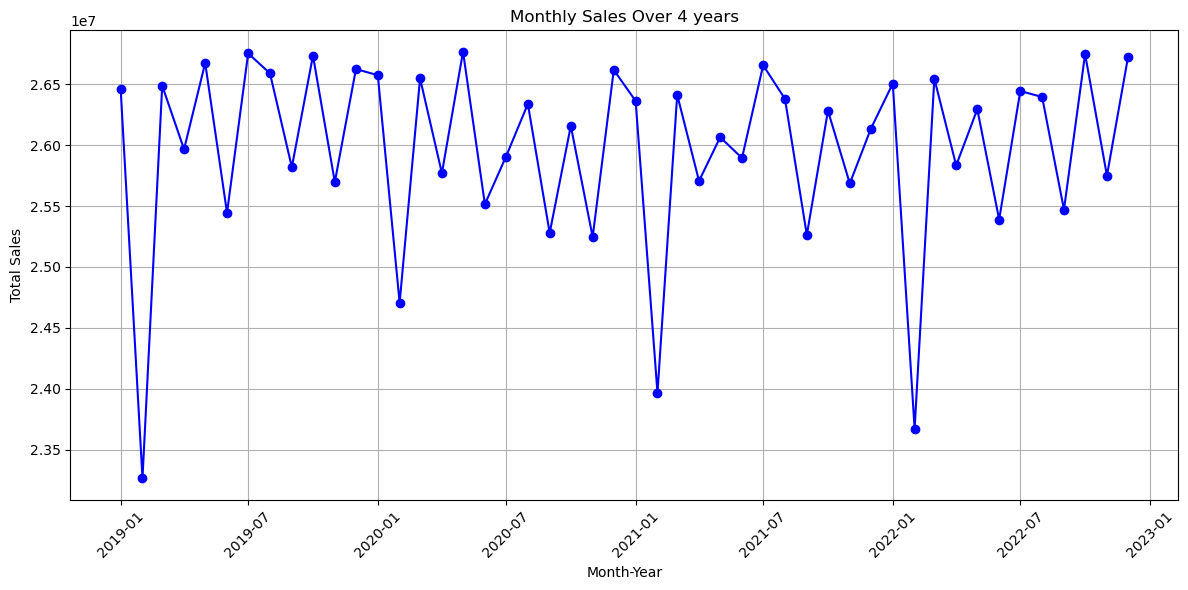

In [13]:
# Plot the monthly sales
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['month_year'], monthly_sales['y'], marker='o', linestyle='-', color='b')

# Adding title and labels
plt.title('Monthly Sales Over 4 years')
plt.xlabel('Month-Year')
plt.ylabel('Total Sales')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Display the plot
plt.show()


## From the graph it is evident that the given dataset has seasonality of one year since the pattern repeats itself after each year

# Initializing the Prophet model

In [14]:
from prophet import Prophet

model = Prophet(yearly_seasonality=True)

# Fitting the prophet model to the dataframe

In [15]:
model.fit(df)

16:45:47 - cmdstanpy - INFO - Chain [1] start processing
16:52:50 - cmdstanpy - INFO - Chain [1] done processing


# Making the future dataframe

In [16]:
future=model.make_future_dataframe(periods=730)
future.tail()

,ds
2186,2024-12-26
2187,2024-12-27
2188,2024-12-28
2189,2024-12-29
2190,2024-12-30


In [17]:
future.head()

,ds
0,2019-01-01
1,2019-01-02
2,2019-01-03
3,2019-01-04
4,2019-01-05


# Forecasting for the future dataframe using model

In [18]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2186,2024-12-26,1236.449936,-754.893391,3075.375903
2187,2024-12-27,1245.033293,-720.269860,3305.943274
2188,2024-12-28,1235.464762,-582.830808,3209.257384
2189,2024-12-29,1230.037190,-770.249751,3141.022830
2190,2024-12-30,1230.679179,-730.945413,3157.628921


# Plot of the forecasted model

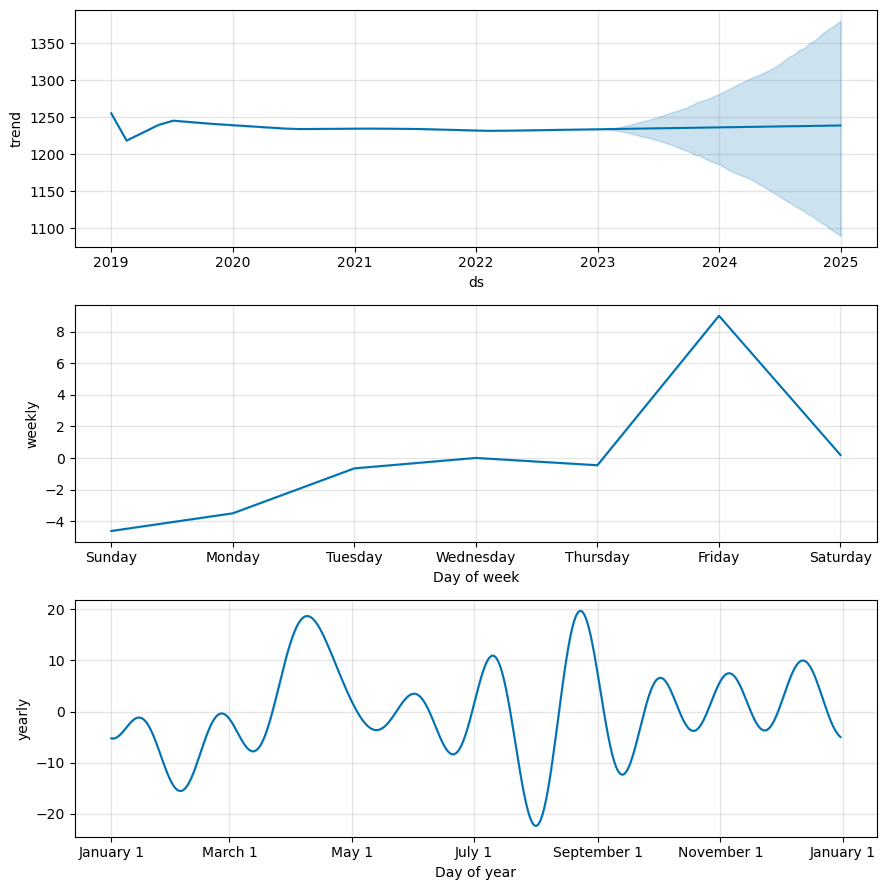

In [19]:
model.plot_components(forecast)
plt.show()

# Cross validation of built model

In [20]:
from prophet.diagnostics import cross_validation, performance_metrics

df_cv = cross_validation(model, initial='1095 days', period='30 days', horizon='365 days')
df_p = performance_metrics(df_cv)
df_p.head()

  0%|          | 0/1 [00:00<?, ?it/s]

16:56:22 - cmdstanpy - INFO - Chain [1] start processing
16:58:01 - cmdstanpy - INFO - Chain [1] done processing


,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,37 days,2.284778e+06,1511.548068,1237.210749,9.445529,1.785533,1.122055,0.835084
1,38 days,2.285730e+06,1511.863196,1237.396101,9.479430,1.786709,1.122518,0.834974
2,39 days,2.284619e+06,1511.495641,1236.912257,9.453175,1.794311,1.122623,0.835135
3,40 days,2.289053e+06,1512.961657,1238.057588,9.505826,1.797847,1.123045,0.834845
4,41 days,2.295054e+06,1514.943509,1239.367707,9.530154,1.785564,1.122508,0.834295


In [21]:
df_p.tail()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
324,361 days,2.310530e+06,1520.042925,1244.918729,9.654690,1.778363,1.120672,0.831236
325,362 days,2.303762e+06,1517.814876,1243.318837,9.682156,1.785707,1.120852,0.832165
326,363 days,2.303014e+06,1517.568491,1242.565012,9.664960,1.768062,1.119738,0.832247
327,364 days,2.306848e+06,1518.831282,1243.484286,9.680087,1.758032,1.119758,0.831738
328,365 days,2.306131e+06,1518.595142,1243.031136,9.684004,1.770371,1.119085,0.831665
